In [ ]:

#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:

df=pd.read_csv("/content/sales_data_analysis/MyDrive/business data analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
# Task 1: Merging 12 months of sales data into a single file
files = [file for file in os.listdir("/content/sales_data_analysis/MyDrive/business data analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data")]

# Creating empty DataFrame to store our data
all_months_data = pd.DataFrame()

# Loop through all files and concatenate them
for file in files:
    df = pd.read_csv("/content/sales_data_analysis/MyDrive/business data analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

# Save the merged data to a CSV file
all_months_data.to_csv("all_data.csv", index=False)

In [ ]:
#Read in the updated Dataframe
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Clean up the data

In [ ]:
#Removing/dropping the NAN rows
#filtering all the NAN rows
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()
#dropping the NaN
all_data=all_data.dropna(how="all")#we use how="all" when dropping a row which has single NAN but if there several use "all"
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Find 'Or' and delete it

In [ ]:

#shows all types of duplicates we have
all_data=all_data[all_data["Order Date"].str[0:2] !='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
#comvert columns to the correct data type
all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])#make it to int
all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])#make it to float

Augment data with additional columns

In [ ]:
#Task 2: Adding month column
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data["Month"]=all_data["Month"].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [ ]:
# Task 3: Adding a new "Sales" column to the 'all_data' DataFrame
# The "Sales" column is calculated by multiplying the "Quantity Ordered" and "Price Each" columns
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

# Displaying the first few rows of the updated DataFrame to verify the changes
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [ ]:
# Task 4: Add a City column

# Function to extract the city from the address
def get_city(address):
    return address.split(",")[1].strip()

# Function to extract the state from the address
def get_state(address):
    return address.split(",")[2].split(" ")[1].strip()

# Applying the get_city and get_state functions to create a new "City" column
# Using a lambda function with apply to iterate over each row in the "Purchase Address" column
# The f-string is used to format the "City" column with the extracted city and state
all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

# Displaying the first few rows of the updated DataFrame
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


QUESTION 1: What was the best Month for sales? How much was earned that month?

In [ ]:
import pandas as pd

# Assuming 'Month' and 'YourColumn' are columns in your DataFrame
# For example, all_data = pd.DataFrame({'Month': [...], 'YourColumn': [...]})

# Group by 'Month' and calculate the sum for each group
grouped_data = all_data.groupby("Month").sum()
# Sort the result in descending order based on the specified column
# Replace 'YourColumn' with the actual column name you want to sum and sort by
sorted_data = grouped_data.sort_values(by='Month', ascending=True)

# Print or use the sorted_data DataFrame as needed

print(sorted_data)

       Quantity Ordered  Price Each       Sales
Month                                          
1                 32627  5418298.34  5449429.61
2                 53790  8753790.20  8806341.00
3                 17059  2800818.81  2816722.88
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 26878  4458545.36  4486783.45
9                 52412  8335774.88  8386047.04
10                22769  3725596.82  3746786.81
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34


<ipython-input-128-629c1373fc03>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = all_data.groupby("Month").sum()


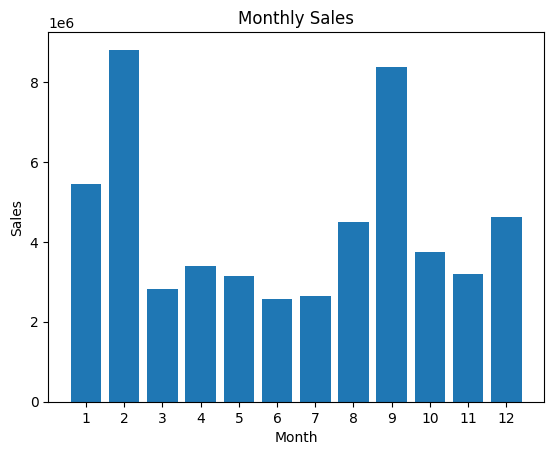

In [ ]:
# Importing the necessary library for plotting
import matplotlib.pyplot as plt

# Assuming 'grouped_data' is a DataFrame with the 'Sales' column grouped by 'Month'

# Define the months as a range from 1 to 13 (exclusive)
Months = range(1, 13)

# Plotting the bar chart using the 'Sales' column from the sorted_data DataFrame
plt.bar(Months, sorted_data["Sales"])

# Adding labels and title to the plot
plt.xticks(Months)  # Setting x-axis ticks to correspond to the months
plt.xlabel("Month")  # Label for the x-axis
plt.ylabel("Sales")  # Label for the y-axis
plt.title("Monthly Sales")  # Title of the plot

# Displaying the plot
plt.show()


QUESTION 2: What city had the best sales

In [ ]:
# Grouping the data by the "City" column and calculating the sum of other columns for each city
grouped_data = all_data.groupby("City").sum()

# Sorting the grouped data based on the "City" column in descending order
sorted_data = grouped_data.sort_values(by='City', ascending=False)

# Adding comments to explain the purpose of each step:

# Grouping the data by city to get the sum of numerical values for each city
grouped_data = all_data.groupby("City").sum()

# Sorting the grouped data based on the "City" column in descending order
sorted_data = grouped_data.sort_values(by='City', ascending=False)


<ipython-input-130-5adc6a8b9962>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = all_data.groupby("City").sum()
<ipython-input-130-5adc6a8b9962>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = all_data.groupby("City").sum()


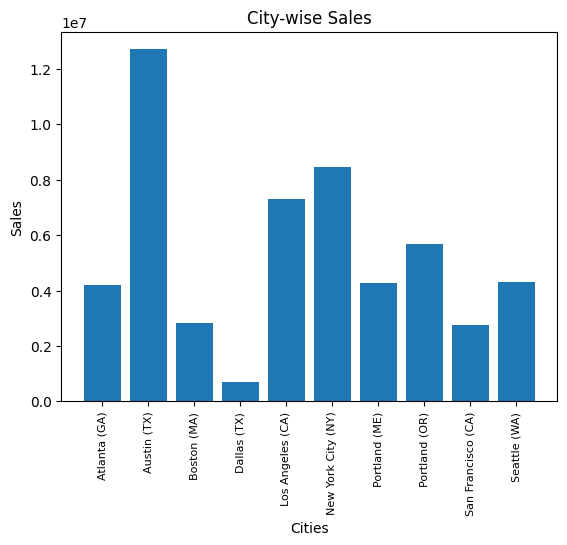

In [ ]:
import matplotlib.pyplot as plt

# Creating a list of cities from the 'City' column in the DataFrame
cities = [City for City, df in all_data.groupby("City")]

# Plotting the bar chart
plt.bar(cities, sorted_data["Sales"])

# Adding labels and title to the plot
plt.xticks(cities, rotation='vertical', size=8)  # Rotate city names for better visibility
plt.xlabel("Cities")  # Label for the x-axis
plt.ylabel("Sales")   # Label for the y-axis
plt.title("City-wise Sales")  # Title of the plot

# Display the plot
plt.show()


QUESTION 3: What time should we display our products to maximize likelihood of customer's buying product?

In [ ]:
all_data["Order Date"]=pd.to_datetime(all_data['Order Date'])#converting into a date time object from string

In [ ]:
# Extracting Hour and Minute information from the 'Order Date' column
all_data['Hour'] = all_data['Order Date'].dt.hour  # Extracting the hour
all_data['Minute'] = all_data['Order Date'].dt.minute  # Extracting the minute

# Displaying the first few rows of the DataFrame with the new 'Hour' and 'Minute' columns
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


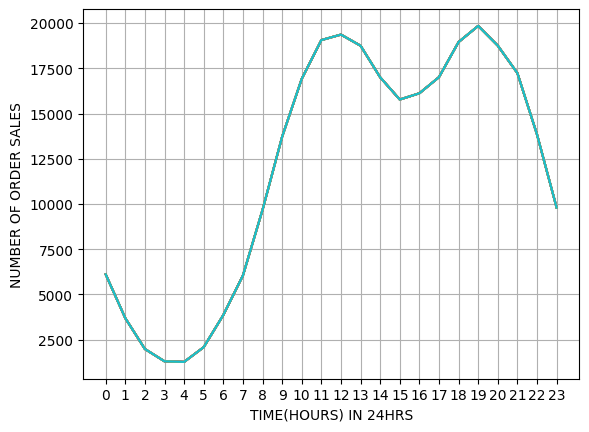

In [ ]:
hours=[hour for hour,df in all_data.groupby("Hour")]
plt.plot(hours,all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.grid()
plt.xlabel("TIME(HOURS) IN 24HRS")
plt.ylabel("NUMBER OF ORDER SALES")
plt.show()

QUESTION 4: What products are often sold together?

In [ ]:
#Hint if they have same ordered ID it means they were sold together and also delivered in same address
#creating new dataframe
#checking for all rows/cells in the ordered id column and see which ones are duplicatede
df=all_data[all_data["Order ID"].duplicated(keep=False)]
df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
df=df[["Order ID","Grouped"]].drop_duplicates()
df.head()

<ipython-input-135-2de52bf98ebd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"]=df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
# Counting pairs of what occurs together most frequently
from itertools import combinations
from collections import Counter

# Create a Counter to store the counts of combinations
count = Counter()

# Iterate over each row in the "Grouped" column of the DataFrame (assuming df is defined)
for row in df["Grouped"]:
    # Split the row into a list of items
    row_list = row.split(",")

    # Update the Counter with combinations of 3 items from the row_list
    count.update(Counter(combinations(row_list, 3)))

# Print the top 10 most common combinations and their counts
for key, value in count.most_common(10):
    print(key, value)


('USB-C Charging Cable', 'USB-C Charging Cable', 'USB-C Charging Cable') 13405
('Lightning Charging Cable', 'Lightning Charging Cable', 'Lightning Charging Cable') 12388
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 11714
('AA Batteries (4-pack)', 'AA Batteries (4-pack)', 'AA Batteries (4-pack)') 11589
('Wired Headphones', 'Wired Headphones', 'Wired Headphones') 10781
('Apple Airpods Headphones', 'Apple Airpods Headphones', 'Apple Airpods Headphones') 8971
('Bose SoundSport Headphones', 'Bose SoundSport Headphones', 'Bose SoundSport Headphones') 7396
('27in FHD Monitor', '27in FHD Monitor', '27in FHD Monitor') 4318
('iPhone', 'iPhone', 'iPhone') 3771
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 3592


QUESTION 5: What product sold the most? why do you think it sold the most?

<ipython-input-137-ee9128851565>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()["Quantity Ordered"]


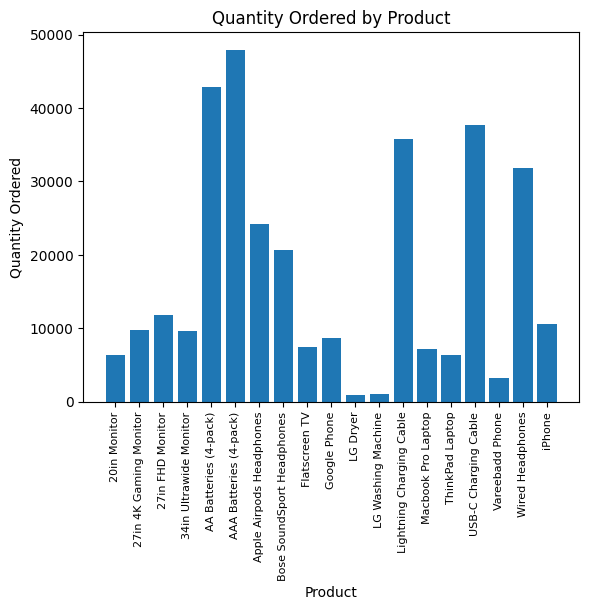

In [ ]:
# Grouping the data by "Product" to analyze the quantity ordered for each product
product_group = all_data.groupby("Product")

# Calculating the total quantity ordered for each product
quantity_ordered = product_group.sum()["Quantity Ordered"]

# Extracting unique product names from the grouped data
products = [product for product, df in product_group]

# Plotting a bar chart to visualize the quantity ordered for each product
plt.bar(products, quantity_ordered)

# Customizing the x-axis by rotating product names vertically for better readability
plt.xticks(products, rotation="vertical", size=8)

# Adding labels and title to the plot
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.title("Quantity Ordered by Product")

# Displaying the plot
plt.show()


<ipython-input-138-3741f29f424c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby("Product").mean()["Price Each"]
<ipython-input-138-3741f29f424c>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", size=8)


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


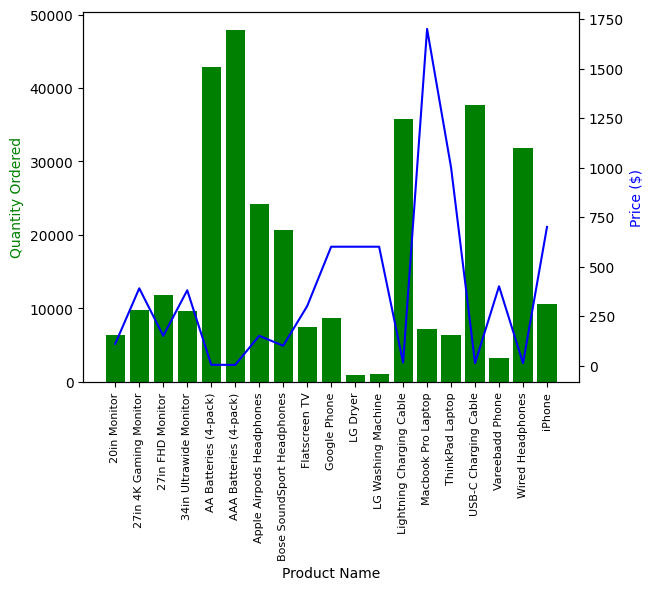

In [ ]:
# Calculating the mean price for each product by grouping the data
prices = all_data.groupby("Product").mean()["Price Each"]

# Displaying the calculated mean prices for each product
print(prices)

# Creating subplots with shared x-axis (products)
fig, ax1 = plt.subplots()

# Creating a twin axes for the second y-axis (prices)
ax2 = ax1.twinx()

# Plotting a bar chart for the quantity ordered on the first axis (green bars)
ax1.bar(products, quantity_ordered, color="g")

# Plotting a line chart for the mean prices on the second axis (blue line)
ax2.plot(products, prices, "b-")

# Adding labels and title to the plot
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color="g")
ax2.set_ylabel("Price ($)", color="b")

# Rotating and resizing x-axis labels for better readability
ax1.set_xticklabels(products, rotation="vertical", size=8)

# Displaying the plot
plt.show()
